### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**The independent variable is the type of test condition, which in the Stroop Test is whether the words are congruent or incongruent with the color of the font. The dependent variable is the time it takes to complete each test.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**The Null Hypothesis is that on average, the congruent test takes the same amount of time or more to complete as it does to complete the incongruent test. The Alternative Hypothesis is that the congruent test takes less time that it takes to complete the incongruent test.**

H<sub>0</sub> = $\mu$<sub>congruent</sub> - $\mu$<sub>incongruent</sub> $\geq$ 0

H<sub>1</sub> = $\mu$<sub>congruent</sub> - $\mu$<sub>incongruent</sub> < 0

**After taking the Stroop Test myself, I discovered that I was able to finish the congruent test faster than I was able to complete the incongruent test. Since, this is what I would like to prove, it is my alternative hypothesis. Therefore, what we believe to be true by default is that the congruent test takes the same amount of time or more to complete. This is my null hypothesis.**



(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

df = pd.read_csv('data/stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [7]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**The mean time for the Congruent test is 14.05 seconds and the mean time for the Incongruent test is 22 seconds. The mean is a measure of center. A good measure of spread/variability is standard deviation. The standard deviation for the Congruent test is 3.56 and 4.80 for the Incongruent test.**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

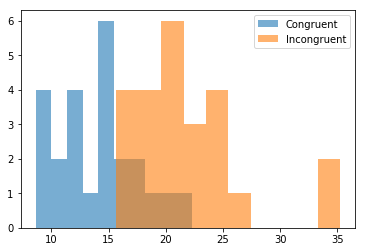

In [19]:
plt.hist(df.Congruent, alpha=0.6, label='Congruent')
plt.hist(df.Incongruent, alpha=0.6, label='Incongruent')
plt.legend(loc='upper right')
plt.show();

**The most common time (i.e the mode) for the Congruent test looks to be around 15 seconds and the most common time for the Incongruent test is around 21 seconds.**

**The range for the Congruent test seems to be around 8 seconds to 22 seconds, while the range for the Incongruent test is from around 16 seconds to 34 seconds. However, the Incongruent test has 2 outliers that took around 34 seconds to complete.**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

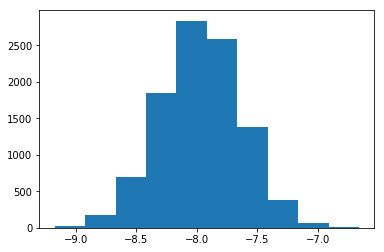

In [29]:
# Get 10,000 differences in mean time between Congruent and Incongruent tests
# from random bootstrapped samples (each sample had a sample size of 200)
diffs = []

for i in range(10000):
    sample = df.sample(200, replace= True)
    con_mean = sample.Congruent.mean()
    incon_mean = sample.Incongruent.mean()
    diffs.append(con_mean - incon_mean)

diffs = np.array(diffs)
plt.hist(diffs);

In [32]:
# Get p-value using bootstrapping method
(diffs >= 0).mean()

0.0

In [34]:
# Get p-value using scipy
import scipy.stats as stats
t_stat, p_val = stats.ttest_1samp(df['Incongruent'], df['Congruent'].mean())
print("T-Statistic: {}".format(t_stat))
print("P-value: {}".format(p_val))

T-Statistic: 8.134018417051042
P-value: 3.221606400621079e-08


**If our confidence level is 5% (i.e $\alpha$=.05), then we can reject the Null Hypothesis in favor of the Alternative Hypothesis and say that the Congruent tests are completed faster than the Incongruent Tests. We can reject because the p-value that we obtained from our statistical analysis is less than .05.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

** I think the reason that we can complete the Congruent test faster is because we've been trained to read from a very young age, so our brains are programmed to read words when we see them. I'm curious if the test result would change if the words were in a foreign language? Or would we also be able to process colors faster if they were all just colored dots?**